<a href="https://colab.research.google.com/github/kotarosakata/datascience_exercise/blob/main/datascience_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データサイエンス 演習課題

In [175]:
#ライブラリをインポートする
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [12]:
# Google Colabの場合は以下のコメントアウトを除去してから実行し、ドライブをマウントしてください
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Google Colabの場合My Drive以下にあります。違う場合は変更してください。なお、ディレクトリはColabの左タブの"ファイル"から確認できます。
path = "/content/drive/My Drive/KosenAI2021/1_5_datascience_assignment/"

In [282]:
#訓練データを読み込む
df_train = pd.read_csv(path + "data/train.csv")
df_train.head()
df_train.corr()


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.309505,0.405606,0.304022,0.198014,0.230355,-0.292668,0.038472,0.316335,0.245392,0.265454,-0.020204,-0.146523,-0.015993,0.201005,0.108730,0.009742,0.024048,0.004291,0.055114,0.049116,0.234790,0.023799,0.293166
boosts,0.309505,1.000000,0.527615,0.361263,0.336560,0.536485,-0.557348,0.005587,0.507443,0.408031,0.423695,0.076672,-0.010001,0.026171,0.253281,0.325350,0.039548,0.112453,0.015042,0.085271,0.107751,0.415337,-0.010235,0.622606
damageDealt,0.405606,0.527615,1.000000,0.738915,0.613479,0.345568,-0.679845,0.047484,0.887535,0.706768,0.567205,-0.004463,-0.039815,0.001112,0.259287,0.141134,0.057495,0.037537,0.013750,0.076535,0.068431,0.348713,0.015833,0.433977
DBNOs,0.304022,0.361263,0.738915,1.000000,0.472896,0.268242,-0.556066,0.039553,0.710301,0.646678,0.457061,-0.013315,-0.265843,-0.000290,0.303804,0.102525,0.034202,0.017166,0.065835,0.059023,0.046913,0.221259,0.008514,0.274839
headshotKills,0.198014,0.336560,0.613479,0.472896,1.000000,0.199813,-0.469345,0.022840,0.675544,0.515591,0.452486,-0.016172,0.008808,0.006163,0.150979,0.077336,0.015566,0.029492,0.007482,0.037941,0.045096,0.217159,0.004432,0.271146
heals,0.230355,0.536485,0.345568,0.268242,0.199813,1.000000,-0.387535,-0.005710,0.314212,0.272532,0.264754,0.111237,-0.063044,0.022496,0.239271,0.291739,0.025444,0.081317,0.037231,0.064641,0.071879,0.312211,-0.014123,0.419538
killPlace,-0.292668,-0.557348,-0.679845,-0.556066,-0.469345,-0.387535,1.000000,-0.020479,-0.733142,-0.809839,-0.540507,-0.008456,0.016604,-0.017800,-0.271563,-0.234642,-0.055330,-0.092501,-0.038163,-0.071586,-0.101965,-0.495957,0.000151,-0.709187
killPoints,0.038472,0.005587,0.047484,0.039553,0.022840,-0.005710,-0.020479,1.000000,0.033959,0.034700,0.010756,-0.103860,-0.041816,-0.975445,0.010069,-0.030781,-0.002141,-0.007072,-0.040015,-0.010321,-0.000332,-0.005382,0.983506,0.009817
kills,0.316335,0.507443,0.887535,0.710301,0.675544,0.314212,-0.733142,0.033959,1.000000,0.805811,0.606735,-0.029001,-0.003007,0.010868,0.256882,0.113421,0.068951,0.041802,0.016598,0.073473,0.065090,0.329672,0.004889,0.413361
killStreaks,0.245392,0.408031,0.706768,0.646678,0.515591,0.272532,-0.809839,0.034700,0.805811,1.000000,0.516436,-0.033568,-0.035686,0.005988,0.244697,0.096335,0.075884,0.037153,0.028388,0.058236,0.055779,0.274609,0.006382,0.371086


In [283]:
#学習モデルを構築する（各自で工夫する）
df_train = df_train.loc[:, ["boosts","kills", "killPlace","walkDistance","rankPoints","winPoints","assists","rideDistance","winPlacePerc"]]
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values


In [276]:
#テストデータに分割
df_train = df_train.loc[:, ["boosts","kills", "killPlace","walkDistance","rankPoints","winPoints","assists","rideDistance","winPlacePerc"]]
train, test = train_test_split(df_train)
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values


y_train.shape


(267056,)

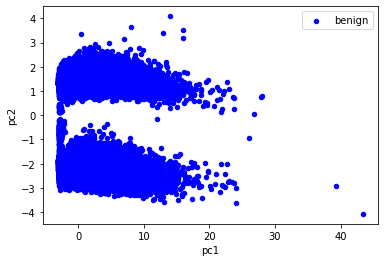

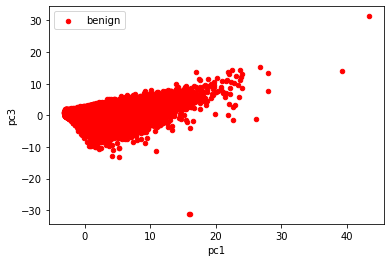

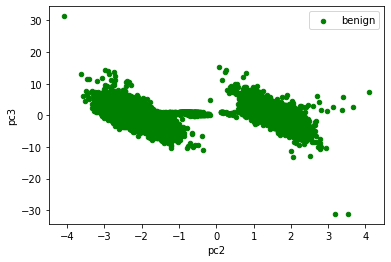

In [181]:

sc = StandardScaler()
X_std = sc.fit_transform(df_train.drop(["Id","matchType"],axis = 1))

# 主成分分析
pca = PCA(n_components=3)
pca.fit(X_std)
X_pca = pca.transform(X_std)
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2','pc3'])
X_pca.plot.scatter(x='pc1', y='pc2', color='blue', label='benign');
X_pca.plot.scatter(x='pc1', y='pc3', color='red', label='benign');
X_pca.plot.scatter(x='pc2', y='pc3', color='green', label='benign');

In [284]:
#テストデータを読み込む
df_test = pd.read_csv(path + "data/test.csv")
df_test.head()

,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,1f356e60dff92f,0,0,100.0,1,0,1,32,0,1,1,38.330,1386,squad,26,1376,0,0.0,0,0.0,0,0,286.416371,3,0
1,720c6b77b48d08,0,2,125.7,0,1,1,25,0,1,1,43.700,1471,squad-fpp,27,1548,0,0.0,0,0.0,0,0,3334.640279,3,0
2,d876b34a35043a,0,2,172.4,1,0,0,33,0,1,1,10.090,1923,squad-fpp,28,1443,1,0.0,0,0.0,0,0,1571.555077,6,0
3,1d9161a58fc74d,1,1,169.7,1,0,7,30,0,1,1,3.556,1378,duo,49,1471,0,0.0,0,0.0,0,0,707.127803,6,0
4,385df125957114,0,0,0.0,0,0,0,84,1047,0,0,0.000,1306,duo,47,-1,0,0.0,0,0.0,0,0,198.654983,2,1499


In [277]:
#学習
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [285]:
df_test = df_test.loc[:, ["boosts","kills", "killPlace","walkDistance","rankPoints","winPoints","assists","rideDistance"]]
X_test = df_test.values
y_pred = lr.predict(X_test)

In [279]:
#予測を行う
#df_test = df_test.loc[:, ["boosts","damageDealt", "weaponsAcquired","damageDealt"]]
#X_test = df_test.values
y_pred = lr.predict(X_test)
y_pred[:8]
np.sum(np.abs(y_test-y_pred))/y_test.size


0.13474645764408727

このように予測ができたら、提出するためのCSVファイルを作成します。

ファイル名は `submission.csv` としてください．
- そのとき，カラム名は以下の通り`id`と`winPlacePerc`にしてください．


In [286]:
#CSVに出力する
filename = "submission.csv"

submission = pd.Series(y_pred, name='winPlacePerc') 
submission.to_csv(path + filename, header=True, index_label='index')
submission.head()

0    0.450526
1    0.653807
2    0.570540
3    0.576437
4    0.147038
Name: winPlacePerc, dtype: float64

# 新しいセクション